In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv('product_sales.csv')
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


# Data Validation

In [210]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


The initial dataset contains 15000 rows and 8 columns.

week: 6 unique values withoout any missing values in the dataset.
    
sales_method: contains 5 methods where it is supposed to have only 3 methods. It has no null values but was cleaned to make it 3 methods as per the descripton.

customer_id: contains uniques value for each customer without any missing values.

nb_sold: numeric values for the number of products sold. It has no missing values.

revenue: numeric value for the revenue generated from the sales, contains 1074 missing values. Considering the similarity between the no. of products sold and revenue in each sales method, missing values are replaced by average value accordingly.

years_as_customer: contains no null values. Since the company was founded in 1984, it is not possible to have a customer for more than 39 years. We have 2 entries where years as customer is greater than 39, which have been adjusted to 39.

nb_site_visits: numeric value for the number times the customer has visited the site. No missing values.

state: has no missing values. No cleaning is needed.

In [211]:
sales.replace({'email':'Email', 'em + call': 'Email + Call'}, inplace=True)

C:\Users\srinadh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No.of Customers')

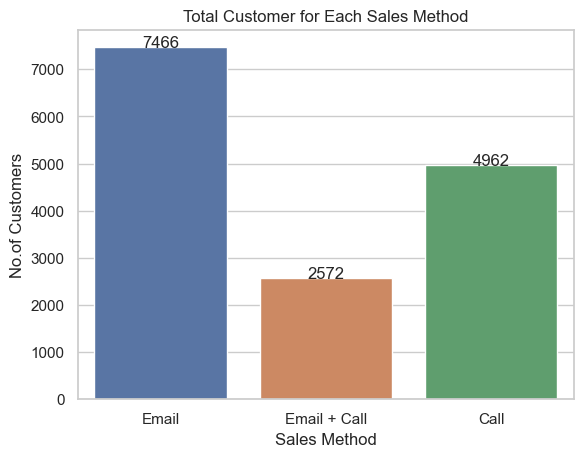

In [288]:
colors = {'Call':'tab:orange', 'Email':'tab:blue', 'Email + Call':'tab:green'}
ax = sns.countplot('sales_method', data=sales)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, f'{int(height)}',
        ha="center")

ax.set_title('Total Customer for Each Sales Method')
ax.set_xlabel('Sales Method')
ax.set_ylabel('No.of Customers')

# Customer Engagement 

Approximately half of the customer base was reached using the 'Email' sales method, while the 'Call' method engaged around one-third (33%) of customers. The 'Email + Call' method accounted for 17% of the customer engagement. 

In [227]:
average_revenue_per_method_and_products = sales.groupby(['sales_method', 'nb_sold'])['revenue'].mean().round(2)

def replace_missing_revenue(row):
    if pd.isnull(row['revenue']):
        avg_revenue = average_revenue_per_method_and_products.get((row['sales_method'], row['nb_sold']))
        return avg_revenue if avg_revenue is not None else row['revenue']
    else:
        return row['revenue']
    
sales['revenue'] = sales.apply(replace_missing_revenue, axis=1)

Text(0.5, 0.01, 'Sales Method')

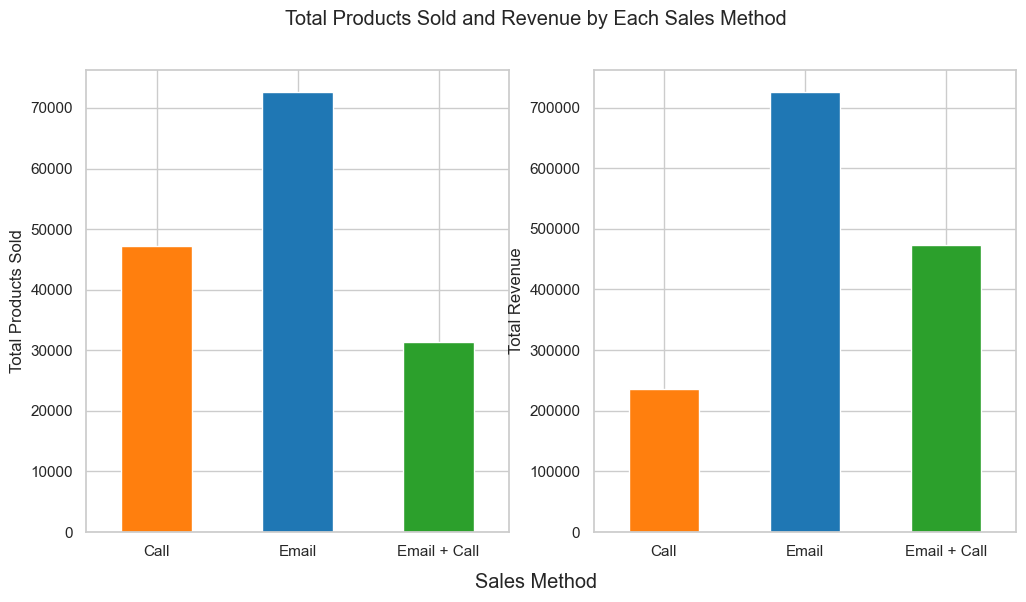

In [280]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = ['tab:orange', 'tab:blue', 'tab:green']

sales.groupby('sales_method')['nb_sold'].sum().plot(kind='bar', color=colors, ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('Total Products Sold')
ax[0].tick_params(axis='x', labelrotation=0)

sales.groupby('sales_method')['revenue'].sum().plot(kind='bar', color=colors, ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('Total Revenue')
ax[1].tick_params(axis='x', labelrotation=0)

fig.suptitle('Total Products Sold and Revenue by Each Sales Method')
fig.supxlabel('Sales Method')


Despite having the lowest number of customers among the methods, the 'Email + Call' strategy emerges as a prominent driver for products sold and revenue generated. This outcome suggests a focused and effective approach that maximizes results per engaged customer.

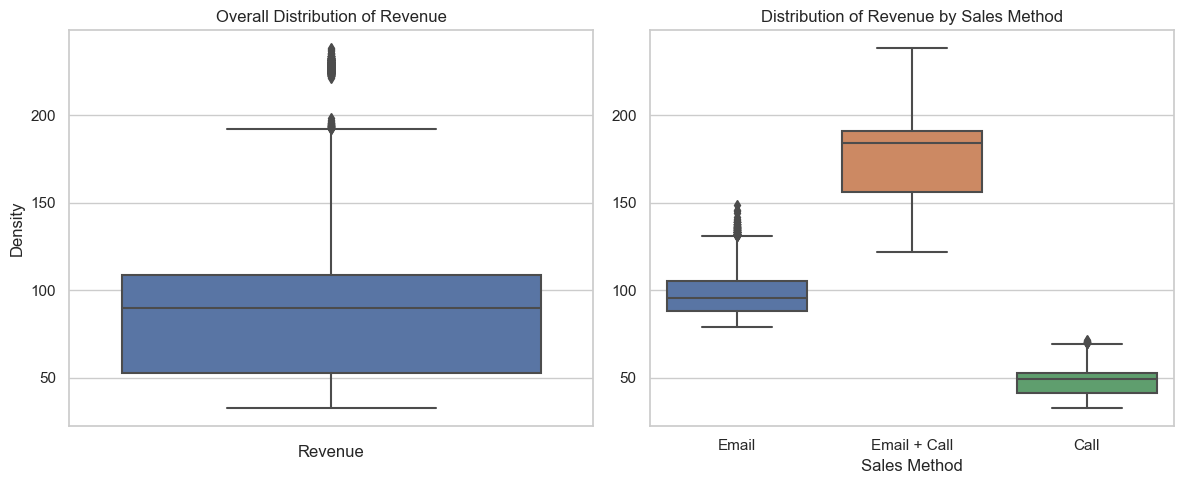

In [244]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the overall distribution of revenue (Box Plot)
sns.boxplot(y='revenue', data=sales, ax=axs[0])
axs[0].set_xlabel('Revenue')
axs[0].set_ylabel('Density')
axs[0].set_title('Overall Distribution of Revenue')

# Plot the distribution of revenue by sales method (Box Plot)
sns.boxplot(x='sales_method', y='revenue', data=sales, ax=axs[1])
axs[1].set_xlabel('Sales Method')
axs[1].set_ylabel('')
axs[1].set_title('Distribution of Revenue by Sales Method')

# Adjust the subplots' layout
plt.tight_layout()

# Show the plots
plt.show()

The overall mean revenue is 95.72. The revenue ranges from 32.54 to 238.32, with 90.00 being the median revenue. The 'Email + Call' method generates the greatest average revenue of 184.23, ranging from 122.11 to 238.32. The 'Email' sales method has an average revenue of 97.19 and a more condensed range of 78.83 and 148.97. The 'Call' approach, in comparison, generates an average revenue of 47.64 which 4 times lesser than that of 'Email + Call' method.

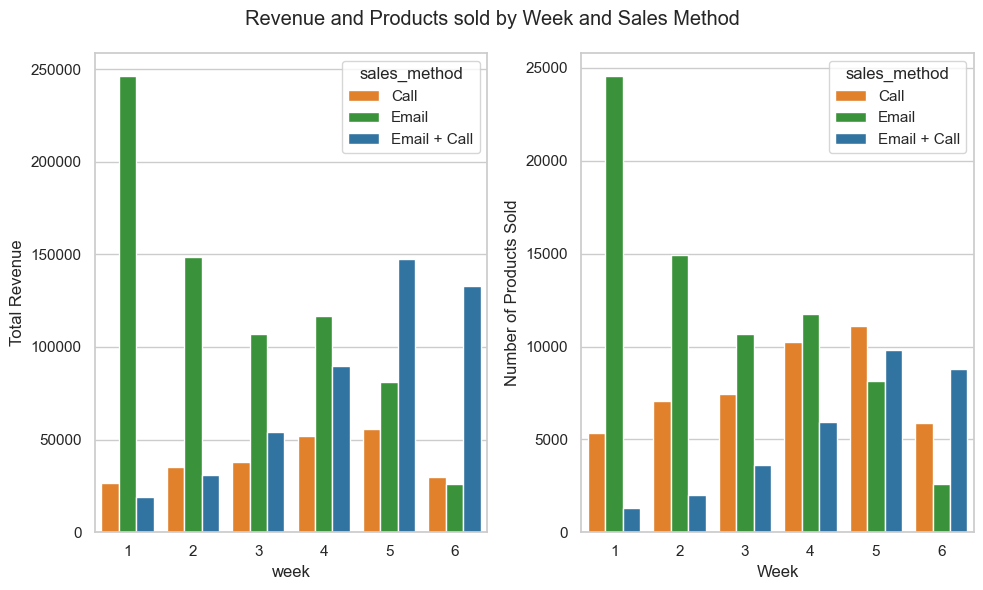

In [258]:
weekly_sales_revenue = sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
weekly_sold_products = sales.groupby(['week', 'sales_method'])['nb_sold'].sum().reset_index()
colors={'Email':'tab:green', 'Call':'tab:orange', 'Email + Call':'tab:blue'}

fig, ax = plt.subplots(1,2, figsize=(10,6), sharex=True)
sns.barplot(x='week',
            y='revenue',
            data=weekly_sales_revenue,
            hue='sales_method',
            palette=colors,
            ax=ax[0])
ax[0].set_ylabel('Total Revenue')



sns.barplot(x='week',
            y='nb_sold',data=weekly_sold_products,
            hue='sales_method',
            palette=colors,
            ax=ax[1])
ax[1].set_xlabel('Week')
ax[1].set_ylabel('Number of Products Sold')

fig.suptitle('Revenue and Products sold by Week and Sales Method')

plt.tight_layout()

In [221]:
max_years_as_customer = 2023 -1984
sales.loc[sales["years_as_customer"]>max_years_as_customer, 'years_as_customer'] = max_years_as_customer

# Business Metrics

By looking at the statistics of products sold and revenue generated by Email + call sales method in comaprison to other two sales method, 

In [231]:
top_states = sales.groupby('state').agg({'customer_id':'count', 'nb_sold':'sum','revenue':'sum' }).sort_values('customer_id',ascending=False)
top_states = top_states.rename(columns={'customer_id':'Total Customers', 'nb_sold':'Products Sold', 'revenue':'Total Revenue'})


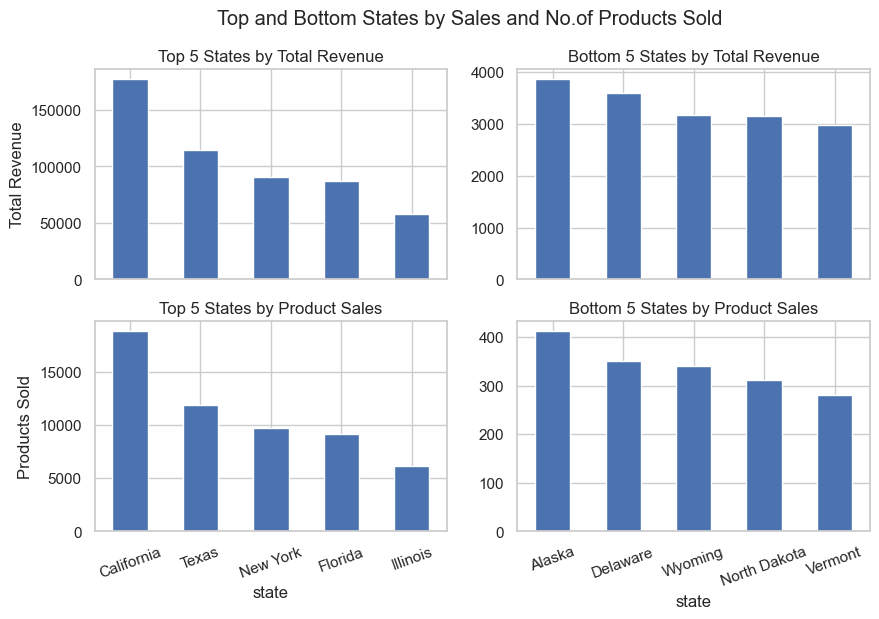

In [286]:
fig, ax = plt.subplots(2,2, figsize=(10, 6))

top_states['Total Revenue'].head(5).plot(kind='bar', ax=ax[0,0], sharex=ax[0,1])
top_states['Total Revenue'].tail(5).plot(kind='bar', ax=ax[0,1])
top_states['Products Sold'].head(5).plot(kind='bar', ax=ax[1,0])    
top_states['Products Sold'].tail(5).plot(kind='bar', ax=ax[1,1])

fig.suptitle("Top and Bottom States by Sales and No.of Products Sold")
ax[0,0].set_ylabel("Total Revenue")
ax[1,0].set_ylabel("Products Sold")

ax[0, 0].set_title("Top 5 States by Total Revenue")
ax[0, 1].set_title("Bottom 5 States by Total Revenue")
ax[1, 0].set_title("Top 5 States by Product Sales")
ax[1, 1].set_title("Bottom 5 States by Product Sales")

ax[1,0].tick_params(axis='x', rotation=20)
ax[1,1].tick_params(axis='x', rotation=20)

Text(0, 0.5, 'Revenue')

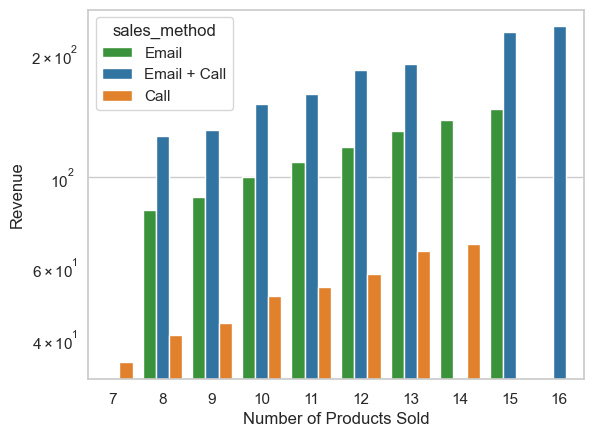

In [247]:
sns.barplot(data=sales, x='nb_sold', y='revenue', hue='sales_method',palette=colors, ci=None)
plt.yscale('log')
plt.xlabel('Number of Products Sold')
plt.ylabel('Revenue')

We can observe distinct patterns in the revenue distribution among the various sales methods. Notably, the 'Email + Call' method stands out with consistently higher revenue levels compared to 'Email' and 'Call' methods, even though it engages a smaller number of customers. This logarithmic representation effectively highlights the significant impact of the 'Email + Call' strategy on revenue generation, emphasizing its potential for driving substantial returns despite its lower customer count.